# Airbnb NYC listings price analysis
## by Iqra 

## Investigation Overview

> The goal of the presentation is to understand how the price of a listing varies with factors such as type of room, the neighborhood as well as the number of reviews and availability. 

## Dataset Overview

> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. The dataset describes the listing activity and metrics in NYC, NY for 2019.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('AB_NYC_2019.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Impact of room type and neighbourhood on price of a listing

> Airbnb listings in NYC that offered the entire apartment were the most expensive on average, with those being in Manhattan at the top of the list. An entire apartment costed about $191 per night on average in Manhattan. The listings in Manhattan were more expensive on average compared to other neighbourhoods. Even a shared room in Manhattan had a higher average price than private rooms in other neighborhoods. Staten Island was the least expensive in terms of finding an airbnb accomodation.

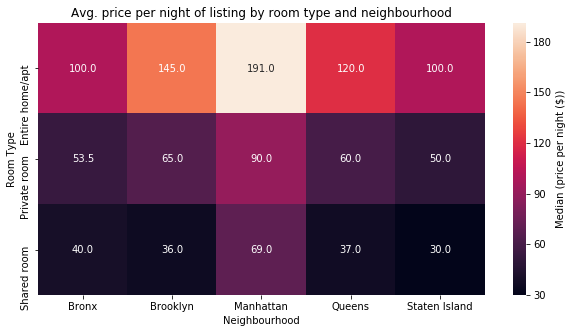

In [5]:
plt.figure(figsize = [10,5])

cat_means = df.groupby(['neighbourhood_group', 'room_type']).median()['price']
cat_means = cat_means.reset_index(name = 'price_avg')
cat_means = cat_means.pivot(index = 'room_type', columns = 'neighbourhood_group',
                            values = 'price_avg')
ax = sb.heatmap(cat_means, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'Median (price per night ($))'})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Neighbourhood')
plt.ylabel('Room Type')
plt.title ('Avg. price per night of listing by room type and neighbourhood', fontsize=12);

## Does price increase with number of reviews?

> The price of a listing has a slightly negative relationship with number of reviews. While there is no way to differentiate between good and bad reviews in the dataset, a breakdown by room type and neighborhood shows that less expensive neigbhourhoods and room types have more reviews on average. This could be one of the reasons for the negative relationship.

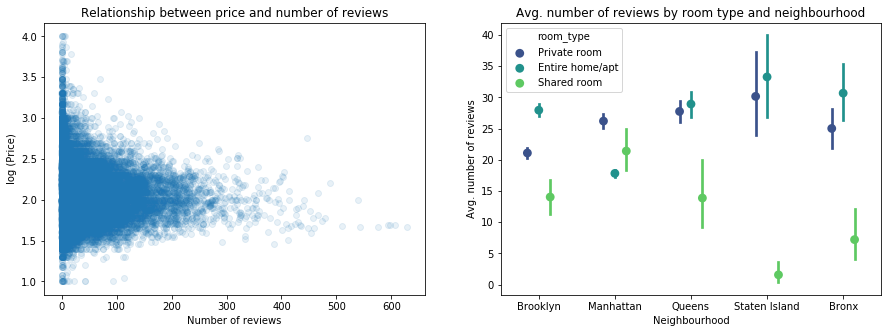

In [6]:
plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
sb.regplot(data=df, x= df['number_of_reviews'], y = df['price'].apply(log_trans),
          x_jitter = 0.2, scatter_kws = {'alpha' : 1/10})
plt.ylabel('log (Price)')
plt.xlabel('Number of reviews')
plt.title('Relationship between price and number of reviews')

plt.subplot(1,2,2)
ax = sb.pointplot(data = df, x = 'neighbourhood_group', y = 'number_of_reviews', hue = 'room_type', palette = 'viridis',
                  dodge = 0.3, linestyles = "")
plt.ylabel('Avg. number of reviews')
plt.xlabel('Neighbourhood')
plt.title('Avg. number of reviews by room type and neighbourhood');

## Impact of how often the listing is available in a year on price


> The median price increases with the availability of entire apartments. For e.g. the apartments that were available 80% of the days in a year have a higher average price than those that were available for 50% of the days. For private rooms, the median price remained stable with changes in availability and for shared rooms a spike in median price can be observed for listings that are available around 38% to 42% of the days in the year.


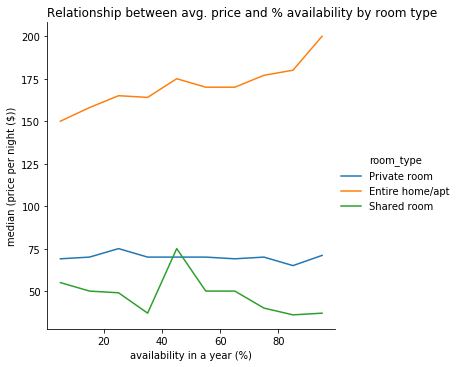

In [7]:
df['availability_perc'] = (df['availability_365']/365)*100

def median_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    medians = y.groupby(data_bins).median()

    # create plot
    plt.errorbar(x = bin_centers, y = medians, **kwargs)

bin_edges = np.arange(0, df['availability_perc'].max()+10, 10)
g = sb.FacetGrid(data = df, hue = 'room_type', size = 5)
g.map(median_poly, "availability_perc", "price", bins = bin_edges)
g.set_ylabels('median (price per night ($))')
g.set_xlabels('availability in a year (%)')
plt.title('Relationship between avg. price and % availability by room type', loc = 'left')
g.add_legend();